<a href="https://colab.research.google.com/github/Masyithah28/PembelajaranMesin_Ganjil_2024/blob/main/Kuis1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro

Pada kuis ini, Anda diminta untuk melakukan klasifikasi citra wajah dengan menggunakan dataset Labeled Face in Wild (LFW).
Spesifikasi pengerjaan kuis yang harus dipehuni adalah,

1. Setiap label dari dataset LFW harus berisikan minimal 10 gambar (5 poin)
2. Citra yang digunakan merupakan citra RGB / color (5 poin)
3. (Opsional) Lakukan proses pra pengolahan data jika diperlukan (ekstra 10 poin)
4. (Wajib) Gunakan fitur histogram untuk setiap channel citra (35 poin)
5. (Wajib) Gunakan algoritma SVM sebagai model dasar (35 poin)
6. (Wajib) Gunakan metric akurasi, dan *classification report* untuk melihat performa model (20 poin)

## Challenge
Setelah menyelesaikan kuis berdasarkan spesifikasi wajib, Anda diperkenankan untuk

- Menggunakan fitur lain selain histogram (ekstra 20 poin)
- Menggunakan model lain selain SVM (ekstra 10 poin)
- Evalusi dengan metric lain ataupun report dengan *confusion matrix* (ekstra 10 poin)

# Boilerplate

Berikut merupakan boilerplate code yang dapat Anda gunakan sebagai acuan dasar pengerjaan kuis.
Anda diperkenankan untuk **menambah** ataupun **mengurangi** bagian boilerplate yang disediakan.

# Preparation

In [1]:
# Load required library
# Import Required Library
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

In [2]:
# Load Dataset
# We will load dataset only for faces with contain min 10 images
# We also want to keep images in color; color=True
faces = fetch_lfw_people(min_faces_per_person=10, color=True)

# Check Faces
print(f'Total Label: {len(faces.target_names)}')
print(f'Data dimension: {faces.images.shape}')
print(f'Images flatten dimension: {faces.data.shape}')

Total Label: 158
Data dimension: (4324, 62, 47, 3)
Images flatten dimension: (4324, 8742)


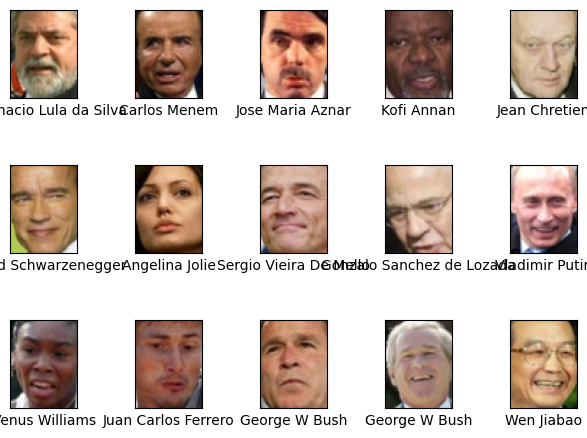

In [3]:
# Check by Plotted Images
# Generate random 15 images
rand_labels = [np.random.randint(0, len(faces.data)) for x in range(0,15)]

fig, ax = plt.subplots(3, 5)
fig.tight_layout()
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[rand_labels[i]], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[rand_labels[i]]])

# Preprocessing

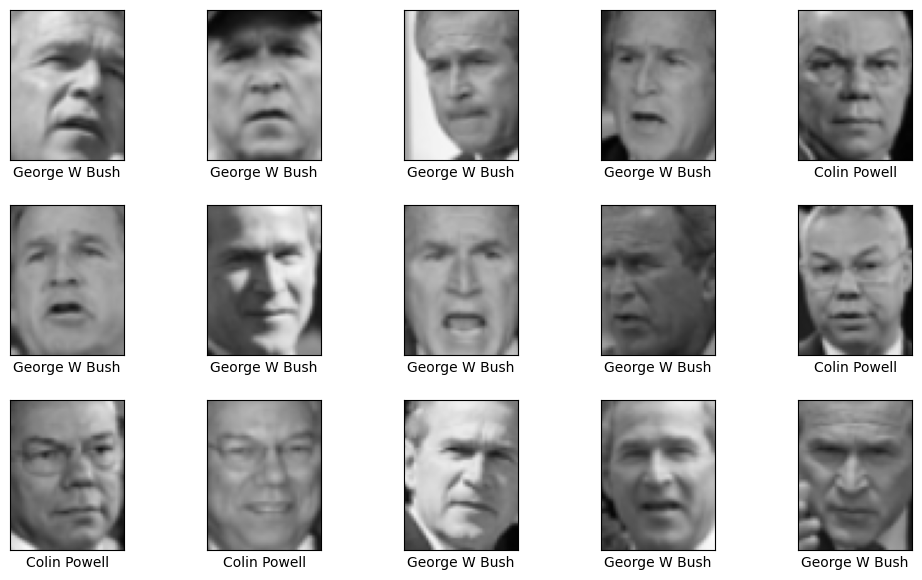

In [27]:
# Check by Plotted Images
# Generate random 15 images, but within the bounds of processed_images
rand_labels = [np.random.randint(0, len(processed_images)) for x in range(0,15)] # Changed line

fig, ax = plt.subplots(3, 5, figsize=(10, 6)) # Added figsize for better visualization
fig.tight_layout()
for i, axi in enumerate(ax.flat):
    axi.imshow(processed_images[rand_labels[i]])
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[rand_labels[i]]])
plt.show()

In [17]:
from skimage.transform import resize
import cv2
# standardisasi fitur
# Normalisasi nilai pixel (0-255 menjadi 0-1)
scaled_images = np.array(lfw_people.images) / 255.0

#Penyesuaian Ukuran Gambar
# Resize gambar ke ukuran 100x100 (opsional)
resized_images = np.array([resize(image, (100, 100)) for image in scaled_images])

# Perubahan Colorspace ke RGB
# Konversi gambar ke RGB (hanya jika diperlukan)
rgb_images = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2RGB) for image in lfw_people.images])



# Features Extraction

In [29]:
import numpy as np

def compute_histogram(image, bins=32):
    """
    Menghitung histogram dari gambar.

    Bekerja untuk gambar grayscale dan berwarna.
    """
    # Jika gambar grayscale, hitung histogram secara langsung
    if len(image.shape) == 2:
        hist, _ = np.histogram(image, bins=bins, range=(0, 256))
        return hist
    # Jika gambar berwarna, hitung histogram untuk setiap channel
    else:
        histograms = []
        for channel in range(image.shape[2]): # Loop untuk setiap channel warna (R, G, B)
            hist, _ = np.histogram(image[:, :, channel], bins=bins, range=(0, 256))
            histograms.extend(hist) # Gabungkan histogram dari setiap channel
        return np.array(histograms)

# Terapkan ekstraksi histogram ke seluruh dataset
histograms = [compute_histogram(img) for img in faces.images]
histograms = np.array(histograms)

# Check shape of histograms
print(f'Bentuk Histogram: {histograms.shape}')

Bentuk Histogram: (766, 32)


# Build Model

In [30]:
# Membagi data menjadi train-test dengan proporsi 80:20
X_train, X_test, y_train, y_test = train_test_split(histograms, faces.target, test_size=0.2, random_state=42)

# Buat model SVM dengan kernel 'rbf' (Radial Basis Function)
svm_model = SVC(kernel='rbf', C=1, gamma='scale')  # 'gamma' menggunakan 'scale' yang lebih stabil

# Melatih model
svm_model.fit(X_train, y_train)

# Prediksi hasil untuk data test
y_pred = svm_model.predict(X_test)


# Evaluation

Akurasi: 70.13%
Classification Report:
               precision    recall  f1-score   support

 Colin Powell       0.00      0.00      0.00        46
George W Bush       0.70      1.00      0.82       108

     accuracy                           0.70       154
    macro avg       0.35      0.50      0.41       154
 weighted avg       0.49      0.70      0.58       154



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


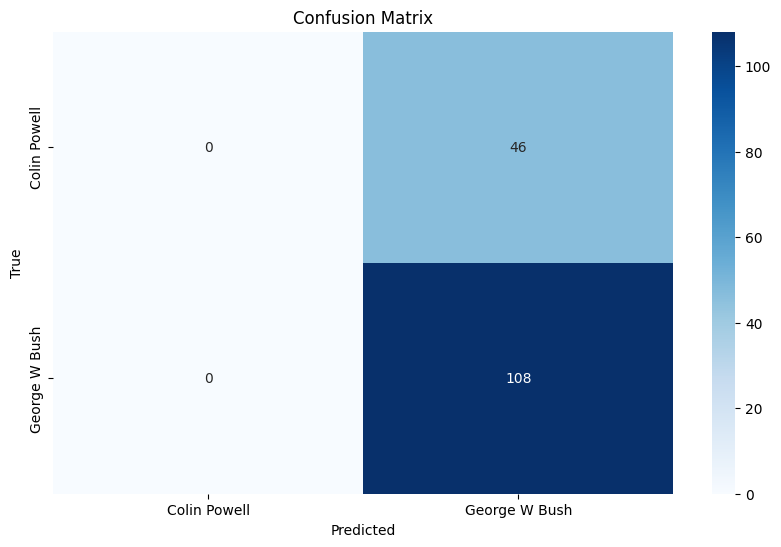

In [31]:
# Hitung akurasi
accuracy = accuracy_score(y_test, y_pred) * 100
print(f'Akurasi: {accuracy:.2f}%')

# Classification report
report = classification_report(y_test, y_pred, target_names=faces.target_names)
print("Classification Report:")
print(report)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=faces.target_names, yticklabels=faces.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
